In [1]:
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import CircularAperture, aperture_photometry, CircularAnnulus, DAOStarFinder
import astropy.io.fits as pf
import numpy as np
import seaborn as sns
sns.set()
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.wcs import WCS
from matplotlib import pyplot as plt
import os
from scipy import stats
from scipy.optimize import curve_fit
from scipy import odr

In [2]:
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project')
file = 'wcsTh_0011.fits'
image = pf.open(file)
w = WCS(image[0].header)
sky = w.pixel_to_world(374,390)
print(sky)

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (82.21018055, 42.43063056)>


In [3]:
x = [82.210469,82.197666,82.192476,82.222068,82.183071,82.177918,82.207615,82.150936,82.273604,82.293393,082.227526]
y = [42.440152,42.422450,42.437444,42.444300,42.446424,42.454144,42.472578,42.449436,42.398775,42.422490,42.371688]
a = []
b = []
for i,j in zip(x,y):
    px, py = w.wcs_world2pix(i,j, 1)
    a.append(px)
    b.append(py)
    print('{0} {1}'.format(px, py))

373.5858865979914 336.6928787360917
427.63438611800774 438.6137162750266
450.1427567256908 352.8922456543315
324.3065797053698 312.47620552802385
490.4318461506621 301.7863888524294
512.5731002335046 257.74014573480144
386.63645175404366 150.99901305307822
627.347198660273 285.6906556594929
103.37744926825982 571.2621672436328
19.837813968286355 434.5432749786887
298.9591524239253 728.3331112680928


In [4]:
x = [82.210469,82.197666,82.192476,82.183071,82.177918,82.207615,82.150936,82.273604,82.293393,082.227526]
y = [42.440152,42.422450,42.437444,42.446424,42.454144,42.472578,42.449436,42.398775,42.422490,42.371688]
a = []
b = []
for i,j in zip(x,y):
    px, py = w.wcs_world2pix(i,j, 1)
    a.append(px)
    b.append(py)
    #print('{0} {1}'.format(px, py))
    
os.chdir(r'C:\Users\garyc\Desktop\4th Year\Astro Project\2V Reduced')
file1 = 'reduceducdTh_0009.fits'
image1 = pf.getdata(file1)
file2 = 'reduceducdTh_0010.fits'
image2 = pf.getdata(file2)
file3 = 'reduceducdTh_0011.fits'
image3 = pf.getdata(file3)
file4 = 'reduceducdTh_0012.fits'
image4 = pf.getdata(file4)
file5 = 'reduceducdTh_0013.fits'
image5 = pf.getdata(file5)
image = image1+image2+image3+image4+image5

a = np.array(a)
b = np.array(b)
a = a
b = b
print(a)
print(b)
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=4.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'

positions = []
for i,j in zip(a,b):
    ID = []
    xref = i
    yref = j
    for k,l,m,o in zip(sources['xcentroid'],sources['ycentroid'],sources['id'],sources['mag']):
        if -5<(k-xref)<5 and -5<(l-yref)<5 and o < -2:
            n = m-1
            ID.append(n)
            positions.append((k,l))
    print(sources[ID])

[373.5858866  427.63438612 450.14275673 490.43184615 512.57310023
 386.63645175 627.34719866 103.37744927  19.83781397 298.95915242]
[336.69287874 438.61371628 352.89224565 301.78638885 257.74014573
 150.99901305 285.69065566 571.26216724 434.54327498 728.33311127]
 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
300 373.29229 334.11874 0.68281455 ...   0 606.38048 26.077291 -3.5406562
 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
399 423.77067 436.08166 0.69998355 ...   0 678.41066 28.839813 -3.6499811
 id xcentroid ycentroid sharpness ... sky    peak      flux      mag    
--- --------- --------- --------- ... --- --------- --------- ----------
318 449.41195 350.90823 0.6717342 ...   0 99229.015 4301.2258 -9.0839806
 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag  

In [5]:
mags = []
magserrors = []
for i in positions:
    aperture = CircularAperture(i, r=3) 
    annulus_aperture = CircularAnnulus(i, r_in=12., r_out=15.)
    apers = [aperture, annulus_aperture]
    phot_table = aperture_photometry(image, apers)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
    bkg_total = bkg_mean * aperture.area
    net_star = phot_table['aperture_sum_0'] - bkg_total
    mags.append(-2.5*np.log10(phot_table['aperture_sum_0'][0]))
    dfdx = -1.08574/phot_table['aperture_sum_0'][0]
    error = np.sqrt((dfdx**2)*(np.sqrt(phot_table['aperture_sum_0'][0]))**2)
    magserrors.append(error)

In [6]:
len(mags)

10

[  0.87319802 -23.19862454]
[[ 0.00094639 -0.01059279]
 [-0.01059279  0.12097118]]
Beta: [  0.78367741 -22.12151054]
Beta Std Error: [0.02912638 0.42277342]
Beta Covariance: [[ 3.35326379e-05 -4.81697334e-04]
 [-4.81697334e-04  7.06496424e-03]]
Residual Variance: 25.299117906972747
Inverse Condition #: 0.05864601305579746
Reason(s) for Halting:
  Sum of squares convergence


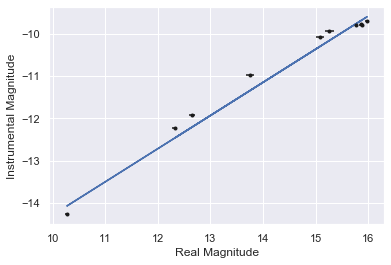

In [7]:
mags = np.array(mags)
realmag = [15.87,15.872,10.272,13.746,15.261,15.979,15.758,12.324,12.642,15.081]
realmag = np.array(realmag)
realmagerrors = [0.037,0.041,0.041,0.073,0.093,0.036,0.036,0.048,0.058,0.077]
plt.errorbar(realmag,mags,magserrors,realmagerrors,fmt='.',color='k')
plt.ylabel('Instrumental Magnitude')
plt.xlabel('Real Magnitude')

def f(x,m,c):
    return m*x+c
popt, pcov = curve_fit(f,realmag,mags,sigma=magserrors)
print(popt)

def func(p, x):
    m, c = p
    return m*x + c
mydata = odr.RealData(realmag, mags, sx = realmagerrors, sy = magserrors)
linear = odr.Model(func)
myodr = odr.ODR(mydata, linear,beta0 =[1, -23])
myoutput = myodr.run()
y = myoutput.beta[0]*realmag+myoutput.beta[1]
plt.plot(realmag,y)
print(pcov)
myoutput.pprint()

In [8]:
xref = 575
yref = 351

ID = []
mean, median, std = sigma_clipped_stats(image, sigma=3)
daofind = DAOStarFinder(fwhm=5.0, threshold=3*std) 
sources = daofind(image - median)
for col in sources.colnames: 
    sources[col].info.format = '%.8g'
for k,l,m in zip(sources['xcentroid'],sources['ycentroid'],sources['id']):
    if -10<(k-xref)<10 and -10<(l-yref)<10:
        n = m-1
        ID.append(n)
print(sources[ID])

 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
241 573.32374 350.30872 0.91748463 ...   0 218438.94 10795.651 -10.083122


In [12]:
sourcemag = []
sourcemagerror = []
position = [(573.32374,350.30872)]
aperture = CircularAperture(position[0], r=3) 
annulus_aperture = CircularAnnulus(position[0], r_in=12., r_out=15.)
apers = [aperture, annulus_aperture]
phot_table = aperture_photometry(image, apers)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area
bkg_total = bkg_mean * aperture.area
net_star = phot_table['aperture_sum_0'] - bkg_total
sourcemag.append(-2.5*np.log10(phot_table['aperture_sum_0'][0]))
sourcemagerror.append((-1.08574/phot_table['aperture_sum_0'][0])*np.sqrt(phot_table['aperture_sum_0'][0]))
print(sourcemag)

[-15.279249164822703]


In [13]:
dy = 1/myoutput.beta[0]
dc = -1/myoutput.beta[0]
dm = (myoutput.beta[1]-sourcemag[0])/(myoutput.beta[0])**2
error = np.sqrt((dy**2)*sourcemagerror[0]**2+(dc**2)*(myoutput.sd_beta[1])**2+(dm**2)*(myoutput.sd_beta[0])**2)
print((sourcemag[0]-myoutput.beta[1])/myoutput.beta[0],'+/-',error)

8.730966722792841 +/- 0.6295491825660273
